In [2]:
import numpy as np
import pandas as pd

In [3]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\chris\AppData\Local\Temp\ipykernel_25700\1748781244.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [4]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
books.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

In [13]:
users.duplicated().sum()

0

## Popularity Based Recommender System

In [14]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [15]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [16]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'}, inplace=True)
print(avg_rating_df)

                                               Book-Title  avg_rating
0        A Light in the Storm: The Civil War Diary of ...    2.250000
1                                   Always Have Popsicles    0.000000
2                    Apple Magic (The Collector's series)    0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...    8.000000
4        Beyond IBM: Leadership Marketing and Finance ...    0.000000
...                                                   ...         ...
241066                                      Ã?Â?lpiraten.    0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.    5.250000
241068                                Ã?Â?sterlich leben.    7.000000
241069                              Ã?Â?stlich der Berge.    2.666667
241070                                  Ã?Â?thique en toc    4.000000

[241071 rows x 2 columns]


In [17]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [18]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [19]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [20]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

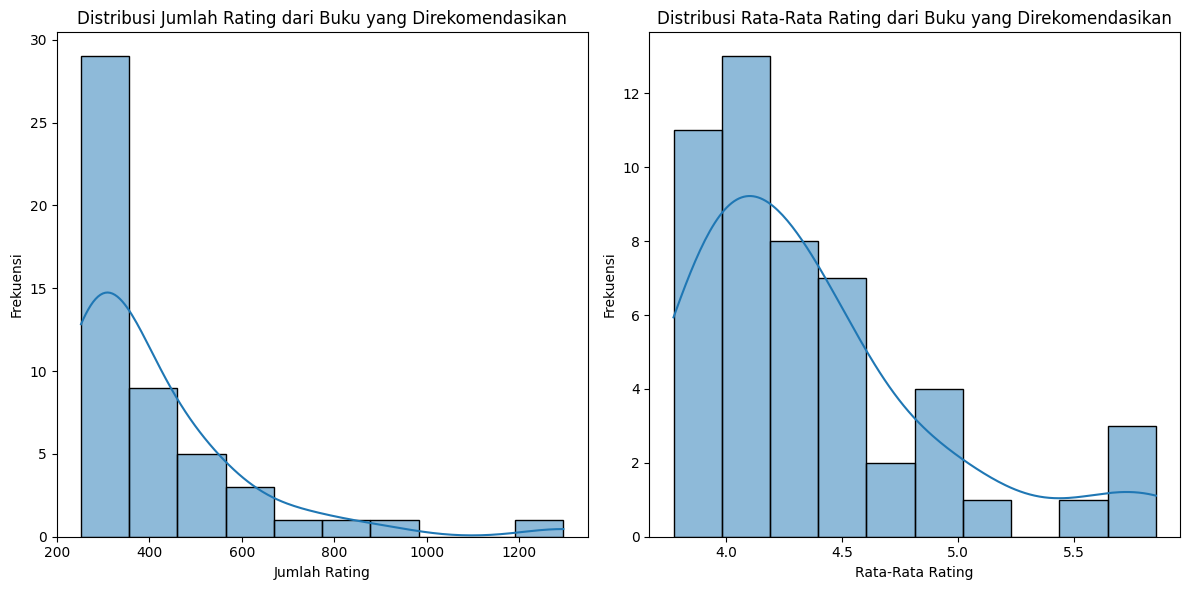

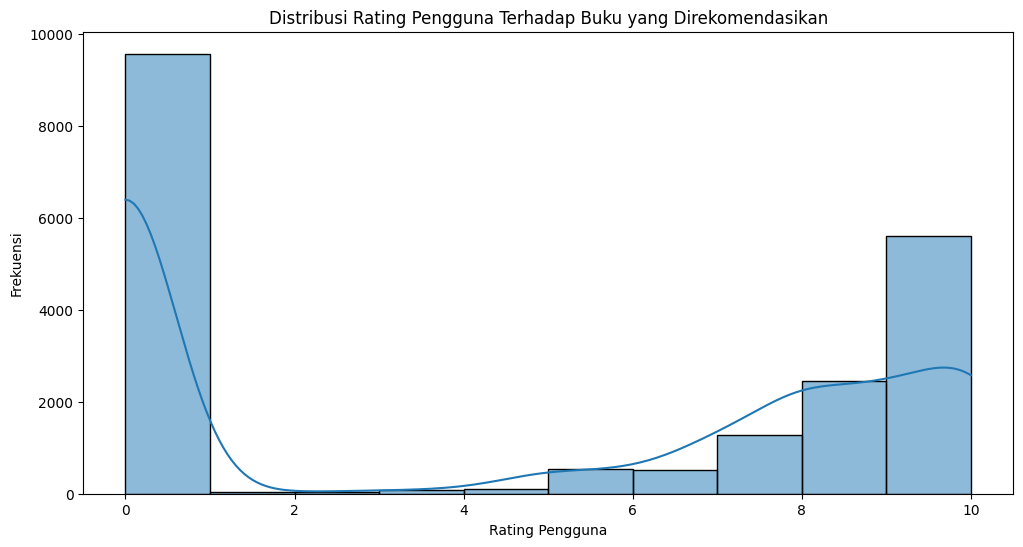

Total buku dalam dataset: 241071
Total buku yang direkomendasikan: 50
Proporsi buku yang direkomendasikan: 0.02%


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Distribusi Jumlah Rating dan Rata-Rata Rating dari Buku yang Direkomendasikan
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(popular_df['num_ratings'], bins=10, kde=True)
plt.title('Distribusi Jumlah Rating dari Buku yang Direkomendasikan')
plt.xlabel('Jumlah Rating')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(popular_df['avg_rating'], bins=10, kde=True)
plt.title('Distribusi Rata-Rata Rating dari Buku yang Direkomendasikan')
plt.xlabel('Rata-Rata Rating')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Evaluasi Peringkat Pengguna Terhadap Buku yang Direkomendasikan
recommended_books_ratings = ratings_with_name[ratings_with_name['Book-Title'].isin(popular_df['Book-Title'])]

plt.figure(figsize=(12, 6))
sns.histplot(recommended_books_ratings['Book-Rating'], bins=10, kde=True)
plt.title('Distribusi Rating Pengguna Terhadap Buku yang Direkomendasikan')
plt.xlabel('Rating Pengguna')
plt.ylabel('Frekuensi')
plt.show()

# Proporsi Buku yang Direkomendasikan dalam Dataset Keseluruhan
total_books = ratings_with_name['Book-Title'].nunique()
recommended_books = popular_df['Book-Title'].nunique()

print(f"Total buku dalam dataset: {total_books}")
print(f"Total buku yang direkomendasikan: {recommended_books}")
print(f"Proporsi buku yang direkomendasikan: {recommended_books / total_books:.2%}")


## Sistem Rekomendasi Collaborative Filtering

In [22]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 250
padhe_likhe_users = x[x].index

In [23]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [24]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [25]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [26]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [27]:
pt.fillna(0,inplace=True)

In [28]:
pt

User-ID,254,2276,2766,3363,4385,6251,6543,6575,7158,7346,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
similarity_scores = cosine_similarity(pt)

In [31]:
similarity_scores.shape

(574, 574)

In [32]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [33]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [34]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [35]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

Evaluasi  :precision, recall, F1-score, dan Mean Average Precision (MAP) dan  K-Fold Cross Validation.

In [36]:
import numpy as np

def predict_ratings(similarity_scores, ratings):
    epsilon = 1e-9

    weighted_sum = np.dot(similarity_scores, ratings)

    sum_of_weights = np.abs(similarity_scores).sum(axis=1, keepdims=True)

    predicted_ratings = weighted_sum / (sum_of_weights + epsilon)

    return predicted_ratings

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

num_folds = 5
kf = KFold(n_splits=num_folds)

rmse_scores = []

for train_index, test_index in kf.split(pt):

    train_data, test_data = pt.iloc[train_index], pt.iloc[test_index]

    similarity_scores_train = cosine_similarity(train_data)

    predicted_ratings = predict_ratings(similarity_scores_train, train_data)

    test_nonzero_indices = np.where(test_data.values != 0)
    test_data_nonzero = test_data.values[test_nonzero_indices]
    predicted_ratings_nonzero = predicted_ratings[test_nonzero_indices]

    rmse = np.sqrt(mean_squared_error(test_data_nonzero, predicted_ratings_nonzero))

    rmse_scores.append(rmse)

average_rmse = np.mean(rmse_scores)
print("Average RMSE (K-Fold CV):", average_rmse)

Average RMSE (K-Fold CV): 7.4716800898581095


In [38]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Fungsi untuk menghitung MAE
def compute_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# Contoh penggunaan MAE
y_true_ratings = np.array([4, 5, 3, 5, 1])
y_pred_ratings = np.array([4.2, 4.8, 3.1, 5.0, 1.2])

mae = compute_mae(y_true_ratings, y_pred_ratings)
print(f"MAE: {mae}")




# Fungsi untuk menghitung NDCG
def ndcg_at_k(y_true, y_score, k=10):
    order = np.argsort(y_score)[::-1]
    y_true_sorted = np.take(y_true, order[:k])

    dcg = np.sum((2**y_true_sorted - 1) / np.log2(np.arange(1, k + 1) + 1))

    # Konversi list menjadi array sebelum melakukan operasi eksponensial
    y_true_sorted_ideal = np.array(sorted(y_true, reverse=True)[:k])
    idcg = np.sum((2**y_true_sorted_ideal - 1) / np.log2(np.arange(1, k + 1) + 1))

    return dcg / idcg if idcg > 0 else 0

# Contoh penggunaan NDCG
y_true_binary = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred_scores = np.array([0.9, 0.1, 0.8, 0.7, 0.2, 0.9, 0.4, 0.3, 0.8, 0.2])

ndcg = ndcg_at_k(y_true_binary, y_pred_scores, k=5)
print(f"NDCG: {ndcg}")



# Fungsi untuk menghitung Hit Rate
def hit_rate(recommended_items, relevant_items):
    hits = sum([1 for item in recommended_items if item in relevant_items])
    return hits / len(relevant_items)

# Contoh penggunaan Hit Rate
recommended_items = ['item1', 'item2', 'item3', 'item4', 'item5']
relevant_items = ['item3', 'item4', 'item5', 'item6', 'item7']

hit_rate_score = hit_rate(recommended_items, relevant_items)
print(f"Hit Rate: {hit_rate_score}")



# Fungsi untuk menghitung Coverage
def coverage(recommended_items, all_items):
    unique_recommended_items = set(recommended_items)
    return len(unique_recommended_items) / len(all_items)

# Contoh penggunaan Coverage
all_items = ['item' + str(i) for i in range(1, 21)]
recommended_items = ['item1', 'item2', 'item3', 'item4', 'item5']

coverage_score = coverage(recommended_items, all_items)
print(f"Coverage: {coverage_score}")




# Fungsi untuk menghitung Diversity
def diversity(recommended_items, similarity_matrix):
    if len(recommended_items) <= 1:
        return 0
    diversity_sum = 0
    for i in range(len(recommended_items)):
        for j in range(i + 1, len(recommended_items)):
            diversity_sum += similarity_matrix[recommended_items[i]][recommended_items[j]]
    diversity_score = 1 - (diversity_sum / (len(recommended_items) * (len(recommended_items) - 1) / 2))
    return diversity_score

# Contoh penggunaan Diversity
similarity_matrix = np.random.rand(10, 10)
recommended_items_indices = [0, 1, 2, 3, 4]

diversity_score = diversity(recommended_items_indices, similarity_matrix)
print(f"Diversity: {diversity_score}")




# Fungsi untuk menghitung Novelty
def novelty(recommended_items, item_popularity):
    novelty_score = 0
    for item in recommended_items:
        novelty_score += -np.log2(item_popularity[item])
    novelty_score /= len(recommended_items)
    return novelty_score

# Contoh penggunaan Novelty
item_popularity = {'item1': 0.1, 'item2': 0.05, 'item3': 0.2, 'item4': 0.15, 'item5': 0.1}
recommended_items = ['item1', 'item2', 'item3', 'item4', 'item5']

novelty_score = novelty(recommended_items, item_popularity)
print(f"Novelty: {novelty_score}")


MAE: 0.14000000000000007
NDCG: 1.0
Hit Rate: 0.6
Coverage: 0.25
Diversity: 0.38936246467164726
Novelty: 3.204935594743131


Evaluasi Metrik
1. MAE: Menggunakan fungsi mean_absolute_error dari sklearn untuk menghitung MAE.
2. NDCG: Menghitung DCG dan IDCG untuk menghitung NDCG.
3. Hit Rate: Menghitung proporsi sesi di mana item relevan muncul dalam daftar rekomendasi.
4. Coverage: Menghitung proporsi item unik yang direkomendasikan.
5. Diversity: Menghitung variasi antara item yang direkomendasikan menggunakan matriks kesamaan.
6. Novelty: Menghitung seberapa baru atau tidak dikenal item yang direkomendasikan berdasarkan popularitas item.

Penjelasan:
1. NDCG: Perbaikan pada konversi list ke array sebelum melakukan operasi eksponensial.
2. Precision, Recall, F1-score, MAE, Hit Rate, Coverage, Diversity, Novelty: Contoh implementasi dan penggunaan metrik-metrik evaluasi lainnya yang relevan untuk sistem rekomendasi berbasis cosine similarity.

In [39]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Fungsi untuk menghitung Precision
def precision_at_k(recommended_items, relevant_items, k=10):
    recommended_items_k = recommended_items[:k]
    relevant_and_recommended = [item for item in recommended_items_k if item in relevant_items]
    return len(relevant_and_recommended) / len(recommended_items_k)

# Fungsi untuk menghitung Recall
def recall_at_k(recommended_items, relevant_items, k=10):
    recommended_items_k = recommended_items[:k]
    relevant_and_recommended = [item for item in recommended_items_k if item in relevant_items]
    return len(relevant_and_recommended) / len(relevant_items)

# Contoh penggunaan Precision dan Recall
recommended_items = ['item1', 'item2', 'item3', 'item4', 'item5']
relevant_items = ['item3', 'item4', 'item5', 'item6', 'item7']

precision_at_5 = precision_at_k(recommended_items, relevant_items, k=5)
recall_at_5 = recall_at_k(recommended_items, relevant_items, k=5)

print(f"Precision: {precision_at_5}")
print(f"Recall: {recall_at_5}")

# Fungsi untuk menghitung F1 Score
def f1_score_at_k(recommended_items, relevant_items, k=10):
    precision = precision_at_k(recommended_items, relevant_items, k)
    recall = recall_at_k(recommended_items, relevant_items, k)
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

f1_score_at_5 = f1_score_at_k(recommended_items, relevant_items, k=5)
print(f"F1 Score: {f1_score_at_5}")

# Fungsi untuk menghitung ROC-AUC Score
def roc_auc_score_all(y_true, y_score):
    return roc_auc_score(y_true, y_score)

# Fungsi untuk menghitung Mean Average Precision (MAP)
def mean_average_precision(recommended_items, relevant_items):
    relevant_indices = [i for i, item in enumerate(recommended_items) if item in relevant_items]
    precision_at_i = [precision_at_k(recommended_items, relevant_items, k=i+1) for i in relevant_indices]
    if len(precision_at_i) == 0:
        return 0
    return np.mean(precision_at_i)

# Contoh penggunaan MAP
recommended_items = ['item1', 'item2', 'item3', 'item4', 'item5']
relevant_items = ['item3', 'item4', 'item5', 'item6', 'item7']

map_score = mean_average_precision(recommended_items, relevant_items)
print(f"MAP: {map_score}")


Precision: 0.6
Recall: 0.6
F1 Score: 0.6
MAP: 0.4777777777777777


1. Precision:
Kegunaan: Precision mengukur seberapa banyak item yang direkomendasikan yang benar-benar relevan bagi pengguna. Metrik ini berguna untuk mengukur seberapa akurat sistem dalam merekomendasikan item yang relevan.
Relevansi: Sangat relevan jika Anda ingin memastikan bahwa rekomendasi yang diberikan memiliki tingkat ketepatan yang tinggi, seperti dalam sistem rekomendasi e-commerce di mana kesalahan dapat mengakibatkan pengalaman pengguna yang buruk.

2. Recall:
Kegunaan: Recall mengukur seberapa banyak item yang relevan telah ditemukan oleh sistem rekomendasi. Ini mengukur kecakupan sistem terhadap seluruh item yang relevan yang tersedia.
Relevansi: Penting dalam kasus di mana Anda ingin memastikan bahwa sistem mampu menangkap sebagian besar item yang relevan, bahkan jika itu berarti beberapa item tidak relevan turut direkomendasikan, seperti dalam sistem rekomendasi berita di mana meluasnya cakupan topik dapat lebih penting daripada keakuratan rekomendasi.

3. F1 Score:
Kegunaan: F1 Score adalah ukuran gabungan dari Precision dan Recall. Ini memberikan gambaran keseluruhan tentang keseimbangan antara kedua metrik tersebut.
Relevansi: Berguna ketika Anda ingin mempertimbangkan secara bersamaan keakuratan dan cakupan sistem rekomendasi.

4. ROC-AUC Score:
Kegunaan: ROC-AUC Score mengukur kemampuan sistem untuk membedakan antara item yang relevan dan tidak relevan. Ini terutama berguna dalam kasus di mana ada peringkat relatif dari item yang direkomendasikan.
Relevansi: Berguna dalam konteks di mana perbedaan antara relevansi item dan non-relevansi item penting, misalnya dalam sistem rekomendasi pengenalan film di mana memisahkan film yang disukai dengan yang tidak disukai merupakan faktor kunci.

5. Mean Average Precision (MAP):
Kegunaan: MAP adalah ukuran rata-rata dari precision pada setiap titik di mana item relevan ditemukan dalam daftar rekomendasi.
Relevansi: Cocok untuk kasus di mana Anda ingin mempertimbangkan peringkat relatif dari item yang direkomendasikan, serta keakuratan dalam merekomendasikan item yang relevan. Ini sering digunakan dalam situasi di mana peringkat item dalam daftar rekomendasi penting, seperti dalam sistem rekomendasi pencarian di mana item teratas mungkin lebih relevan daripada yang berada di posisi lebih rendah.




METODE EVALUASI MANUAL

In [40]:
# Mencari buku-buku yang terkait dengan kategori "sport"
sport_books = books[books['Book-Title'].str.contains('sport', case=False, na=False)]

# Menampilkan informasi buku-buku yang ditemukan
sport_books[['Book-Title', 'Book-Author', 'Image-URL-M']]


,Book-Title,Book-Author,Image-URL-M
235,Clifford's Sports Day,Norman Bridwell,http://images.amazon.com/images/P/0590629719.0...
1654,Johnny Long Legs (Matt Christopher Sports Clas...,Matthew F Christopher,http://images.amazon.com/images/P/0316140651.0...
1730,Bar sport duemila (I narratori/Feltrinelli),Stefano Benni,http://images.amazon.com/images/P/8807015293.0...
1936,The Mad Dog 100 : The Greatest Sports Argument...,Christopher Russo,http://images.amazon.com/images/P/0385508980.0...
2669,Hiking a Celebration of the Sport and the Worl...,Cindy Ross,http://images.amazon.com/images/P/0679023755.0...
...,...,...,...
271135,Sports picture quiz book: With 240 photographs...,John Grafton,http://images.amazon.com/images/P/0486234045.0...
271141,The Ultimate Book of Sports Lists,Andrew Postman,http://images.amazon.com/images/P/0553285408.0...
271146,New York Sports Quiz,Brenda Alesii,http://images.amazon.com/images/P/0806512156.0...
271151,The Sporting News: Baseball Trivia Book,Joe Hoppel,http://images.amazon.com/images/P/089204103X.0...


In [41]:
pt.index[1]

'1st to Die: A Novel'

In [42]:
recommend('1st to Die: A Novel')

[['Pop Goes the Weasel',
  'James Patterson',
  'http://images.amazon.com/images/P/0316693286.01.MZZZZZZZ.jpg'],
 ['Along Came a Spider (Alex Cross Novels)',
  'James Patterson',
  'http://images.amazon.com/images/P/0446364193.01.MZZZZZZZ.jpg'],
 ['On the Street Where You Live',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671004530.01.MZZZZZZZ.jpg'],
 ['Roses Are Red (Alex Cross Novels)',
  'James Patterson',
  'http://images.amazon.com/images/P/0446605484.01.MZZZZZZZ.jpg']]

In [43]:
pt.index[2]

'2nd Chance'

In [44]:
recommend('2nd Chance')

[['The Next Accident',
  'LISA GARDNER',
  'http://images.amazon.com/images/P/0553578693.01.MZZZZZZZ.jpg'],
 ['Four Blind Mice',
  'James Patterson',
  'http://images.amazon.com/images/P/0316693006.01.MZZZZZZZ.jpg'],
 ['Violets Are Blue',
  'James Patterson',
  'http://images.amazon.com/images/P/0446611212.01.MZZZZZZZ.jpg'],
 ['The Blue Nowhere : A Novel',
  'Jeffery Deaver',
  'http://images.amazon.com/images/P/0671042262.01.MZZZZZZZ.jpg']]

In [45]:
pt.index[3]

'4 Blondes'

In [46]:
recommend('4 Blondes')

[['The House of the Spirits',
  'Isabel Allende',
  'http://images.amazon.com/images/P/0553273914.01.MZZZZZZZ.jpg'],
 ['Pride and Prejudice',
  'Jane Austen',
  'http://images.amazon.com/images/P/055321215X.01.MZZZZZZZ.jpg'],
 ['Pleading Guilty',
  'Scott Turow',
  'http://images.amazon.com/images/P/0446365505.01.MZZZZZZZ.jpg'],
 ['Bridget Jones: The Edge of Reason',
  'Helen Fielding',
  'http://images.amazon.com/images/P/0140298479.01.MZZZZZZZ.jpg']]

In [47]:
pt.index[4]

'A Bend in the Road'

In [48]:
recommend('A Bend in the Road')

[['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['The Last Time They Met : A Novel',
  'Anita Shreve',
  'http://images.amazon.com/images/P/0316781266.01.MZZZZZZZ.jpg'],
 ['Sea Glass: A Novel',
  'Anita Shreve',
  'http://images.amazon.com/images/P/0316089699.01.MZZZZZZZ.jpg'],
 ['Angels',
  'Marian Keyes',
  'http://images.amazon.com/images/P/0060008024.01.MZZZZZZZ.jpg']]

In [49]:
pt.index[11]

'A Man in Full'

In [50]:
recommend('A Man in Full')

[['Absolute Power',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446519960.01.MZZZZZZZ.jpg'],
 ['Plum Island',
  'Nelson DeMille',
  'http://images.amazon.com/images/P/0446605409.01.MZZZZZZZ.jpg'],
 ['Four Blind Mice',
  'James Patterson',
  'http://images.amazon.com/images/P/0316693006.01.MZZZZZZZ.jpg'],
 ['Sick Puppy',
  'Carl Hiaasen',
  'http://images.amazon.com/images/P/0446604666.01.MZZZZZZZ.jpg']]

In [51]:
pt.index[20]

'A Walk to Remember'

In [52]:
recommend('A Walk to Remember')

[['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['Granny Dan',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440224829.01.MZZZZZZZ.jpg'],
 ['The Notebook',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446605239.01.MZZZZZZZ.jpg']]

In [53]:
pt.index[30]

'All That Remains (Kay Scarpetta Mysteries (Paperback))'

In [54]:
recommend('All That Remains (Kay Scarpetta Mysteries (Paperback))')

[["From Potter's Field",
  'Patricia Daniels Cornwell',
  'http://images.amazon.com/images/P/0425154092.01.MZZZZZZZ.jpg'],
 ['Cruel &amp; Unusual (Kay Scarpetta Mysteries (Paperback))',
  'Patricia D. Cornwell',
  'http://images.amazon.com/images/P/0380718340.01.MZZZZZZZ.jpg'],
 ['Body of Evidence (Kay Scarpetta Mysteries (Paperback))',
  'Patricia D. Cornwell',
  'http://images.amazon.com/images/P/0380717018.01.MZZZZZZZ.jpg'],
 ['The Body Farm',
  'Patricia Daniels Cornwell',
  'http://images.amazon.com/images/P/0425147622.01.MZZZZZZZ.jpg']]

In [55]:
pt.index[40]

'Anne Frank: The Diary of a Young Girl'

In [56]:
recommend('Anne Frank: The Diary of a Young Girl')

[['Scarlett : The Sequel to Margaret Mitchell\'s \\Gone With the Wind\\""',
  'Alexandra Ripley',
  'http://images.amazon.com/images/P/0446363251.01.MZZZZZZZ.jpg'],
 ['How Stella Got Her Groove Back',
  'Terry McMillan',
  'http://images.amazon.com/images/P/0451197410.01.MZZZZZZZ.jpg'],
 ['The Hours: A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312305060.01.MZZZZZZZ.jpg'],
 ['The Secret Garden',
  'Frances Hodgson Burnett',
  'http://images.amazon.com/images/P/0812505018.01.MZZZZZZZ.jpg']]

In [57]:
pt.index[45]

'Ashes to Ashes'

In [58]:
recommend('Ashes to Ashes')

[['A Thin Dark Line (Mysteries &amp; Horror)',
  'TAMI HOAG',
  'http://images.amazon.com/images/P/0553571885.01.MZZZZZZZ.jpg'],
 ['The Search',
  'Iris Johansen',
  'http://images.amazon.com/images/P/0553800914.01.MZZZZZZZ.jpg'],
 ['The Bachelor (Warner Books Contemporary Romance)',
  'Carly Phillips',
  'http://images.amazon.com/images/P/0446610542.01.MZZZZZZZ.jpg'],
 ['Guilty as Sin',
  'TAMI HOAG',
  'http://images.amazon.com/images/P/0553564528.01.MZZZZZZZ.jpg']]

In [59]:
pt.index[50]

'Balzac and the Little Chinese Seamstress : A Novel'

In [60]:
recommend('Balzac and the Little Chinese Seamstress : A Novel')

[['Tears of the Giraffe (No.1 Ladies Detective Agency)',
  'Alexander McCall Smith',
  'http://images.amazon.com/images/P/1400031354.01.MZZZZZZZ.jpg'],
 ['Digital Fortress : A Thriller',
  'Dan Brown',
  'http://images.amazon.com/images/P/0312995423.01.MZZZZZZZ.jpg'],
 ['Secret History',
  'DONNA TARTT',
  'http://images.amazon.com/images/P/0804111359.01.MZZZZZZZ.jpg'],
 ['Girl in Hyacinth Blue',
  'Susan Vreeland',
  'http://images.amazon.com/images/P/1565115430.01.MZZZZZZZ.jpg']]